In [1]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras import Input, Model, regularizers
import visualkeras
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D, Reshape
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from keras import regularizers
from keras.regularizers import l1, l2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from PIL import Image

In [3]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

### Normalization

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

### Visualization

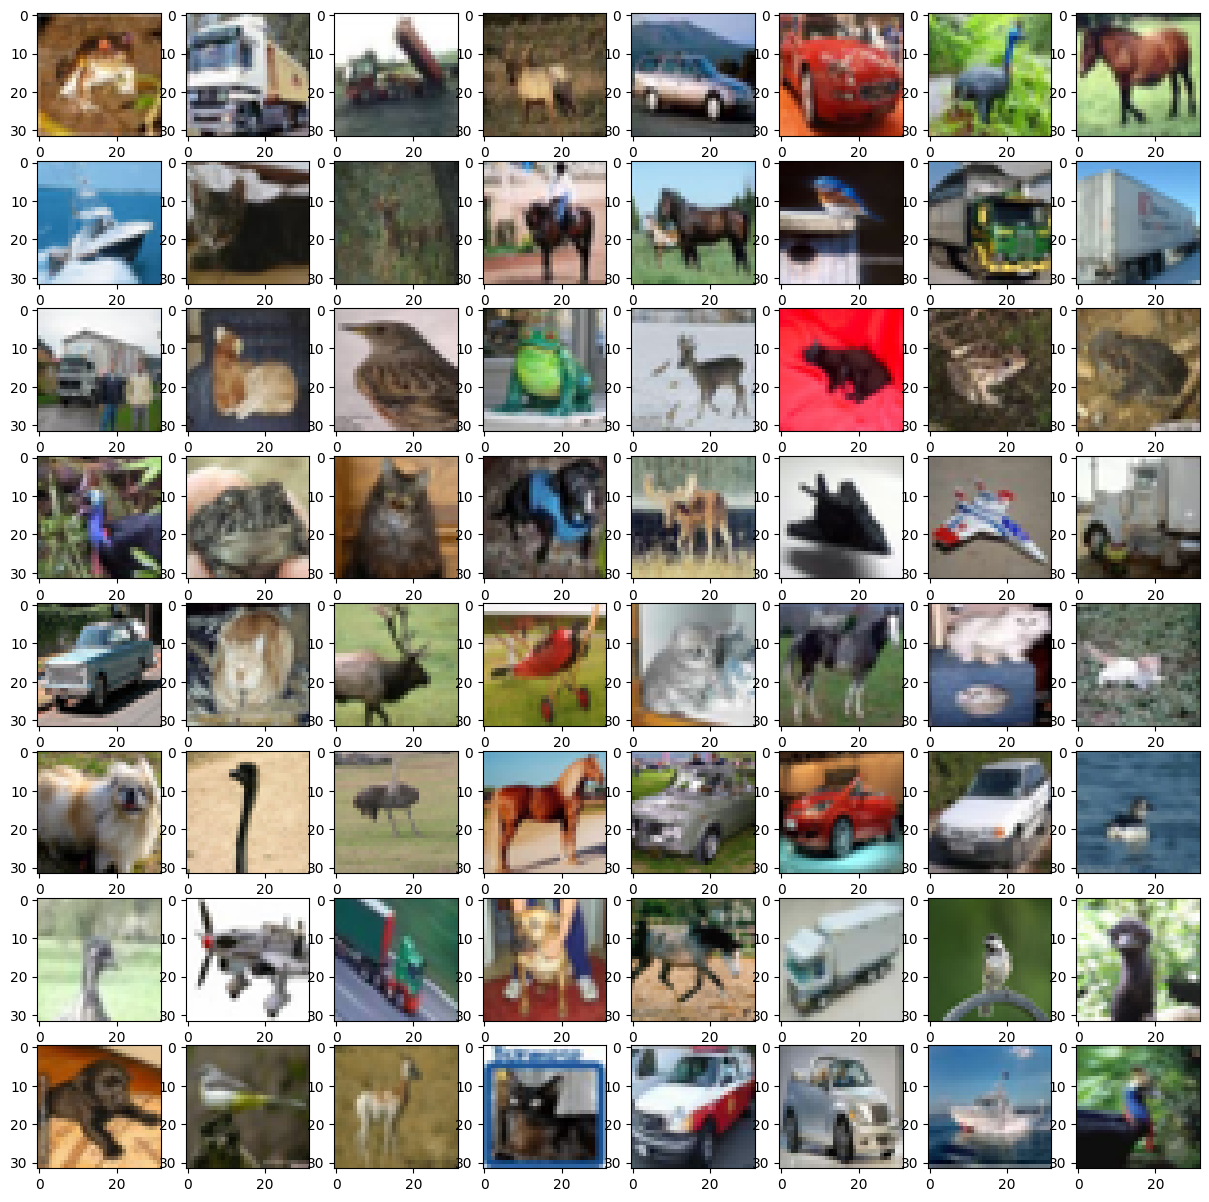

In [7]:
fig, ax = plt.subplots(8, 8, figsize=(15, 15))
k = 0
 
for i in range(8):
    for j in range(8):
        ax[i][j].imshow(X_train[k], aspect='auto')
        k += 1
 
plt.show()

### Model creating

In [8]:
model = tf.keras.Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=X_train[0].shape, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(1024, activation='relu', bias_regularizer = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', bias_regularizer = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

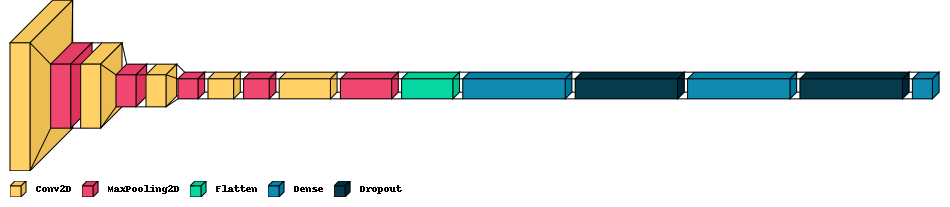

In [10]:
# Visualization
visualkeras.layered_view(model, legend=True)

### Model compiling

In [11]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model fitting

In [12]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=40, batch_size=64)

Epoch 1/40
625/625 [==============================] - 20s 10ms/step - loss: 1.6259 - accuracy: 0.3867 - val_loss: 1.2849 - val_accuracy: 0.5339
Epoch 2/40
625/625 [==============================] - 5s 8ms/step - loss: 1.1862 - accuracy: 0.5724 - val_loss: 1.0305 - val_accuracy: 0.6354
Epoch 3/40
625/625 [==============================] - 5s 8ms/step - loss: 0.9678 - accuracy: 0.6587 - val_loss: 0.9577 - val_accuracy: 0.6681
Epoch 4/40
625/625 [==============================] - 6s 10ms/step - loss: 0.8203 - accuracy: 0.7109 - val_loss: 0.9480 - val_accuracy: 0.6706
Epoch 5/40
625/625 [==============================] - 8s 12ms/step - loss: 0.7060 - accuracy: 0.7533 - val_loss: 0.8860 - val_accuracy: 0.6972
Epoch 6/40
625/625 [==============================] - 5s 8ms/step - loss: 0.6097 - accuracy: 0.7889 - val_loss: 0.8389 - val_accuracy: 0.7182
Epoch 7/40
625/625 [==============================] - 6s 9ms/step - loss: 0.5394 - accuracy: 0.8135 - val_loss: 0.9192 - val_accuracy: 0.7116
Ep

### Evaluation

In [13]:
train_loss, train_acc = model.evaluate(X_train, Y_train, verbose=0)
print("Train Accuracy: %.2f%%" % (train_acc*100))
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %.2f%%" % (test_acc*100))

Train Accuracy: 93.27%
Test Accuracy: 71.27%


313/313 [==============================] - 2s 6ms/step
Accuracy: 0.7127
Precision: 0.7127431141915401
Recall: 0.7127000000000001
F1 Score: 0.7109953495362742


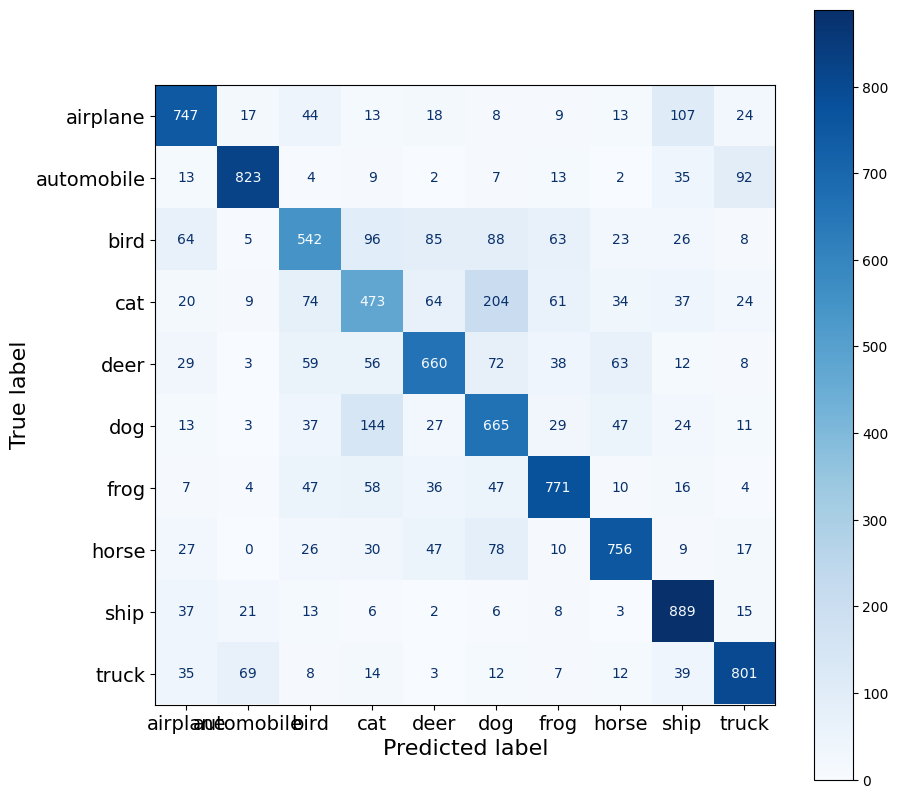

In [16]:
Y_pred = model.predict(X_test, verbose=1)
Y_pred = np.argmax(Y_pred, axis=1)
Y_test_cal = np.argmax(Y_test, axis=1)

accuracy = accuracy_score(Y_test_cal, Y_pred)
precision = precision_score(Y_test_cal, Y_pred, average='macro')
recall = recall_score(Y_test_cal, Y_pred, average='macro')
f1 = f1_score(Y_test_cal, Y_pred, average='macro')
cm = confusion_matrix(Y_test_cal, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
plt.show()


### Real life prediction

In [17]:
ROOT_DIR = 'CNN_Object_Detection'
IN_GOOGLE_COLAB = True

if IN_GOOGLE_COLAB:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')

    # change the current working directory
    %cd gdrive/'My Drive'

    # create a root directory if there's none
    if not os.path.isdir(ROOT_DIR):
        %mkdir $ROOT_DIR

    # change the current working directory
    %cd $ROOT_DIR

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive
/content/gdrive/My Drive/CNN_Object_Detection


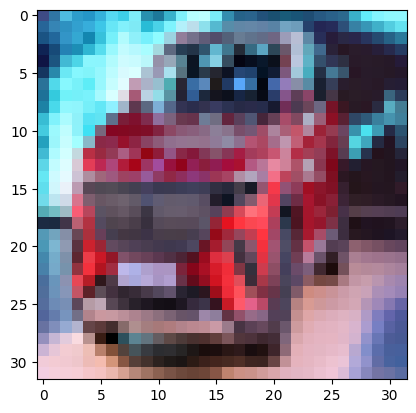

In [18]:
img = "togg.png"
image = np.array(Image.open(img).resize((32,32)))
plt.imshow(image)
image = image / 255.
image = image.reshape(1,32,32,3)

In [19]:
Y_pred = model.predict(image, verbose = 1)
class_idx = np.argmax(Y_pred)
class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
class_label = class_labels[class_idx]

print("The predicted class is:", class_label)

1/1 [==============================] - 0s 181ms/step
The predicted class is: automobile
